<a href="https://colab.research.google.com/github/kaylangu/kmc/blob/main/SCRIPTS/healthcare_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is meant to perform the ARIMA moving-average analysis for the second project in the fall 2024 offering of DS 4002. The datasets are personal healthcare expenses by state in millions, state populations, average annual salary, and Medicaid enrollment numbers from the years 2014-2020.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# total healthcare costs for entire state (in millions of dollars)
personal_healthcare = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/personal_healthcare_expenses_cleaned.csv")
state_populations = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/state_population_cleaned.csv")

# median household salary per state
annual_salary = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/average_salary_state.csv")

# enrollment numbers per state
# TODO: mark what states are enrolled in Medicaid and which aren't?
medicaid_enrollment = pd.read_csv("https://raw.githubusercontent.com/anajonicholson/DS4002-Project2/refs/heads/main/DATA/medicaid_enrollment_cleaned.csv")

In [38]:
personal_healthcare.head()

,State,2014,2015,2016,2017,2018,2019,2020,Average_Expense
0,Connecticut,35350,36941,38322,39289,40671,42190,44425,39598.285714
1,Maine,12134,12747,13347,13891,14674,15461,16306,14080.000000
2,Massachusetts,70311,74842,78446,80621,84112,87764,91817,81130.428571
3,New Hampshire,12498,13057,13648,14278,14871,15391,16113,14265.142857
4,Rhode Island,10020,10478,10747,10872,11084,11627,12362,11027.142857


In [39]:
annual_salary.head()

,State,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Alabama,53070,55920,55920,62250,59900,66430,63980,63750,62290,60660
1,Alaska,84900,94360,94290,95440,82450,92670,87440,90850,93310,98190
2,Arizona,61830,65640,71100,73060,74710,83540,78480,79310,76370,82660
3,Arkansas,56390,53770,57170,60880,60880,64470,59400,56870,56120,63250
4,California,75930,79940,82980,85710,84560,92330,90840,91350,88690,89870


In [40]:
medicaid_enrollment.head()

,State,2014,2015,2016,2017,2018,2019,2020,Average_Enrollment
0,Connecticut,884,914,989,1036,1063,1087,1130,1014.714286
1,Maine,321,305,301,295,287,306,346,308.714286
2,Massachusetts,1571,1591,1633,1601,1600,1522,1538,1579.428571
3,New Hampshire,147,184,203,202,193,187,200,188.000000
4,Rhode Island,211,229,242,264,262,253,257,245.428571


In [41]:
state_populations.drop(51, inplace=True) # had Puerto Rico
personal_healthcare = personal_healthcare.sort_values(by="State") # not in alphabetical order
personal_healthcare.reset_index(drop=True, inplace=True)

personal_healthcare

,State,2014,2015,2016,2017,2018,2019,2020,Average_Expense
0,Alabama,35248,37172,38778,39778,40810,42903,45673,40051.714286
1,Alaska,7765,8462,8734,9116,9352,9702,9975,9015.142857
2,Arizona,44177,47043,49926,53135,55997,59392,64980,53521.428571
3,Arkansas,21624,22706,24172,25260,25740,26744,28300,24935.142857
4,California,288330,311146,325931,338088,357648,379715,405451,343758.428571
5,Colorado,35757,38589,40595,42777,45566,47715,49849,42978.285714
6,Connecticut,35350,36941,38322,39289,40671,42190,44425,39598.285714
7,Delaware,9577,10093,10386,10962,11382,11928,12729,11008.142857
8,District of Columbia,7947,8463,8836,9154,9497,9869,10251,9145.285714
9,Florida,158144,168417,175724,184902,194444,203957,214408,185713.714286


In [42]:
# generate healthcare costs as a percentage of annual salary per state

cost_over_salary = pd.DataFrame()
cost_over_salary["State"] = state_populations["State"]

for year in range(2014, 2021):
  year = str(year)
  cost_over_salary[year] = (personal_healthcare[year] * 1000000 / state_populations[year]) / annual_salary[year] * 100

cost_over_salary

,State,2014,2015,2016,2017,2018,2019,2020
0,Alabama,13.712127,13.692324,14.248613,13.099743,13.927923,13.158972,14.504908
1,Alaska,12.408580,12.144391,12.474043,12.890378,15.398130,14.271217,15.602404
2,Arizona,10.611983,10.488831,10.111125,10.318812,10.462046,9.749810,11.156676
3,Arkansas,12.916921,14.171747,14.132196,13.812737,14.036399,13.731568,15.721086
4,California,9.840989,10.004664,10.032970,10.027400,10.724619,10.428079,11.337493
5,Colorado,8.732364,8.456768,8.333375,8.298889,9.129126,9.668649,8.757506
6,Connecticut,11.161666,11.241780,11.323226,12.085048,13.027136,11.464254,13.439617
7,Delaware,14.213123,14.765295,15.125565,14.394065,15.092456,13.925830,15.746036
8,District of Columbia,13.972154,14.200250,14.538911,13.201911,13.107134,12.656027,13.935068
9,Florida,13.752409,13.579385,13.367374,13.569079,13.956042,13.753447,14.600279


In [43]:
# ARIMA analysis
# perform moving average analysis on average healthcare cost

# add year as its own column and values rather than naming the column
cost_over_salary_long = cost_over_salary.melt(id_vars=["State"], var_name="Year", value_name="Adjusted_Per_Capita_Healthcare")
cost_over_salary_long["Year"] = cost_over_salary_long["Year"].astype(int)  # Convert Year to integer for proper sorting

# calculate the 3-year moving average by state
cost_over_salary_long['Moving_Avg'] = (
    cost_over_salary_long.groupby('State')['Adjusted_Per_Capita_Healthcare']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

cost_over_salary_long.head()


,State,Year,Adjusted_Per_Capita_Healthcare,Moving_Avg
0,Alabama,2014,13.712127,13.712127
1,Alaska,2014,12.408580,12.408580
2,Arizona,2014,10.611983,10.611983
3,Arkansas,2014,12.916921,12.916921
4,California,2014,9.840989,9.840989


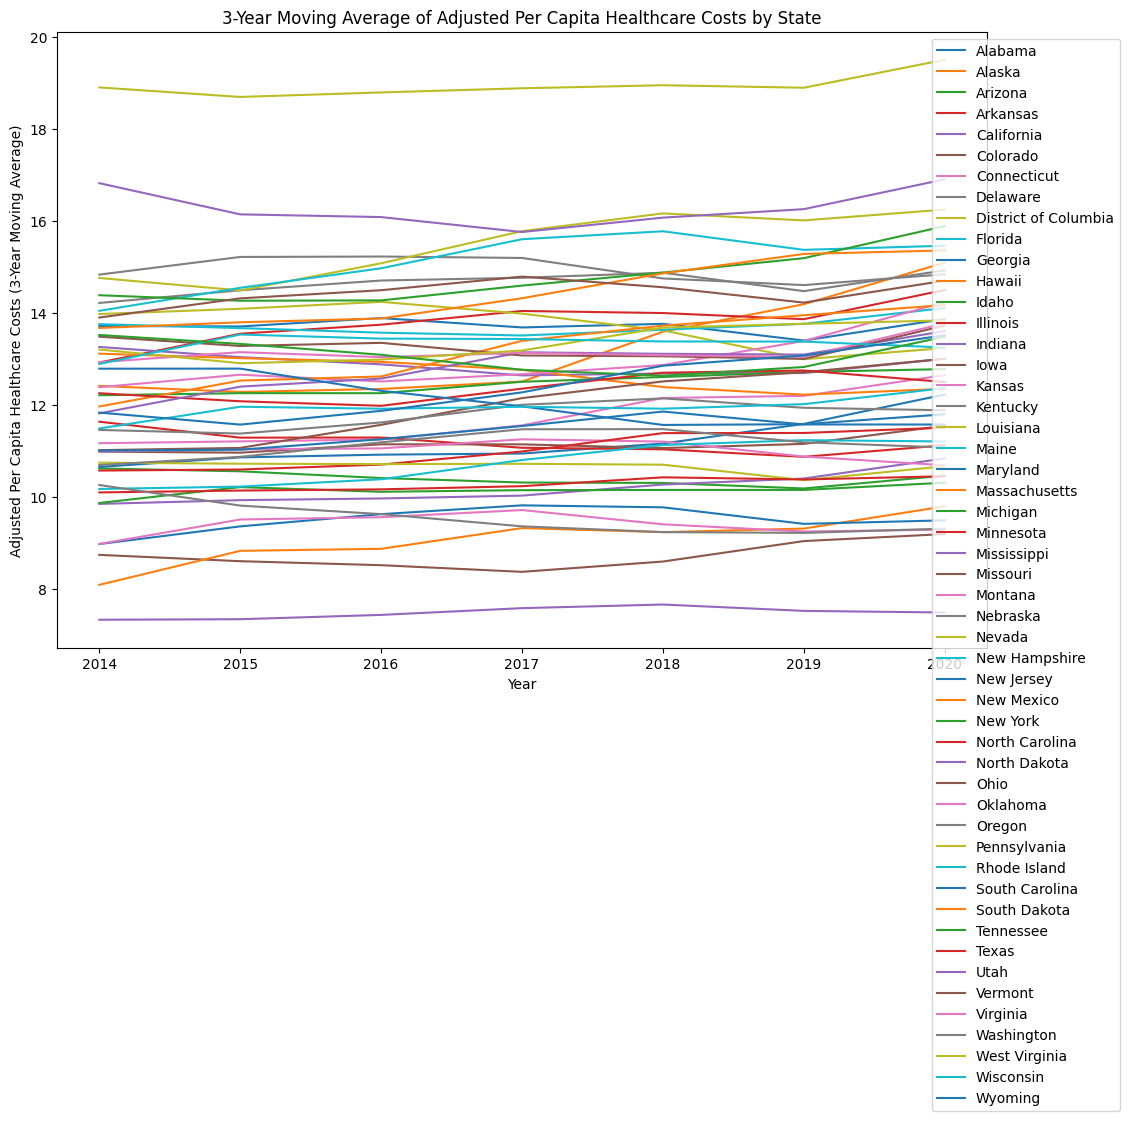

In [44]:
plt.figure(figsize=(12, 8))
for state in cost_over_salary_long['State'].unique():
    state_data = cost_over_salary_long[cost_over_salary_long['State'] == state]
    plt.plot(
        state_data['Year'],
        state_data['Moving_Avg'],
        label=state
    )
plt.xlabel("Year")
plt.ylabel("Adjusted Per Capita Healthcare Costs (3-Year Moving Average)")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.title("3-Year Moving Average of Adjusted Per Capita Healthcare Costs by State")
plt.show()


In [45]:
medicaid_enrollment.drop('Average_Enrollment', axis=1, inplace=True)

medicaid_enrollment_long = medicaid_enrollment.melt(id_vars=["State"], var_name="Year", value_name="Medicaid_Enrollment")
medicaid_enrollment_long["Year"] = medicaid_enrollment_long["Year"].astype(int)

# merge the two DataFrames on State and Year
merged_df = pd.merge(cost_over_salary_long, medicaid_enrollment_long, on=["State", "Year"])


After performing the moving-average analysis to adjust the healthcare costs, the ARIMA model may be used to understand the now-adjusted per capita healthcare costs along with the Medicaid enrollment numbers, which is considered an extra factor for this analysis.

In [46]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore") # suppress warnings

# dictionary to store results
results_data = {
    'State': [],
    'Medicaid_Coef': [],
    'Medicaid_P_Value': [],
    'AR_Coef': [],
    'AR_P_Value': [],
    'MA_Coef': [],
    'MA_P_Value': [],
    'AIC': []
}

arima_results = {}

for state in merged_df['State'].unique():
    state_data = merged_df[merged_df['State'] == state].set_index("Year")
    endog = state_data['Adjusted_Per_Capita_Healthcare']
    exog = state_data[['Medicaid_Enrollment']]

    try:
        model = ARIMA(endog, order=(1, 1, 1), exog=exog)
        fitted_model = model.fit()

        results_data['State'].append(state)
        results_data['Medicaid_Coef'].append(fitted_model.params.get('Medicaid_Enrollment', float('nan')))
        results_data['Medicaid_P_Value'].append(fitted_model.pvalues.get('Medicaid_Enrollment', float('nan')))
        results_data['AR_Coef'].append(fitted_model.params.get('ar.L1', float('nan')))
        results_data['AR_P_Value'].append(fitted_model.pvalues.get('ar.L1', float('nan')))
        results_data['MA_Coef'].append(fitted_model.params.get('ma.L1', float('nan')))
        results_data['MA_P_Value'].append(fitted_model.pvalues.get('ma.L1', float('nan')))
        results_data['AIC'].append(fitted_model.aic)

        arima_results[state] = fitted_model.summary()

    except Exception as e:
        print(f"ARIMA model could not be fit for {state}: {e}")

# Convert to DataFrame
results_df = pd.DataFrame(results_data)


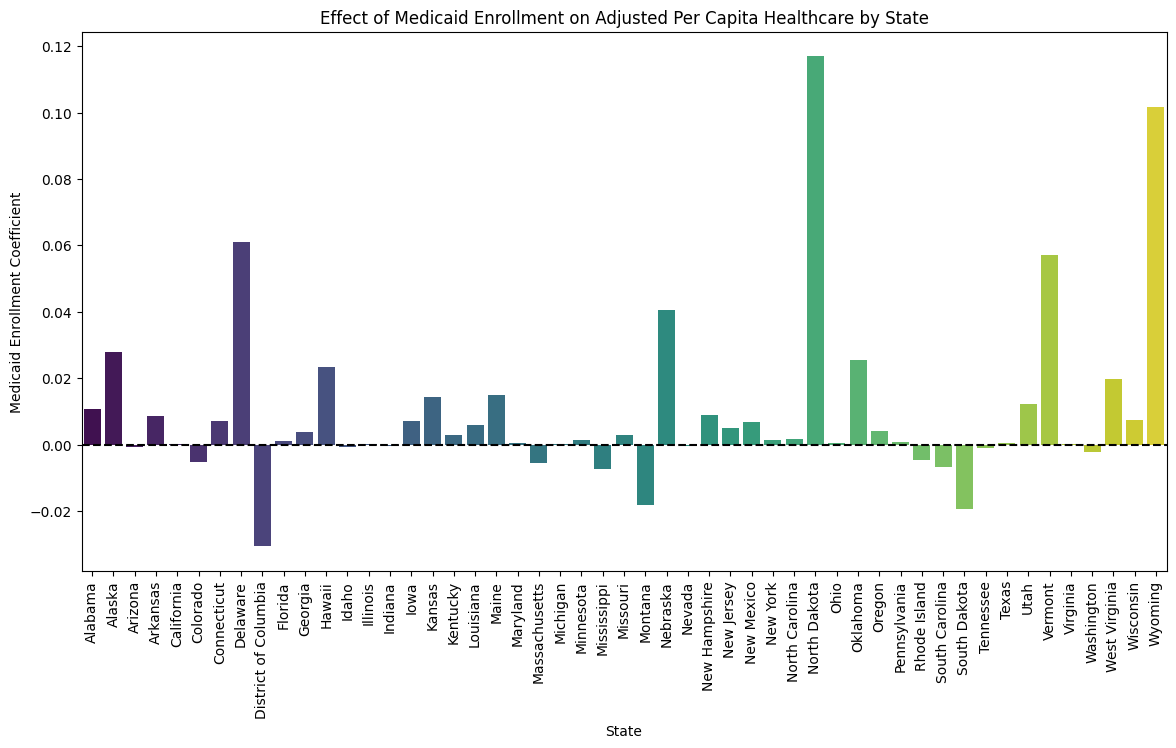

In [47]:
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Medicaid_Coef', data=results_df, palette='viridis')
plt.axhline(0, color='black', linestyle='--')
plt.title("Effect of Medicaid Enrollment on Adjusted Per Capita Healthcare by State")
plt.xticks(rotation=90)
plt.ylabel("Medicaid Enrollment Coefficient")
plt.show()


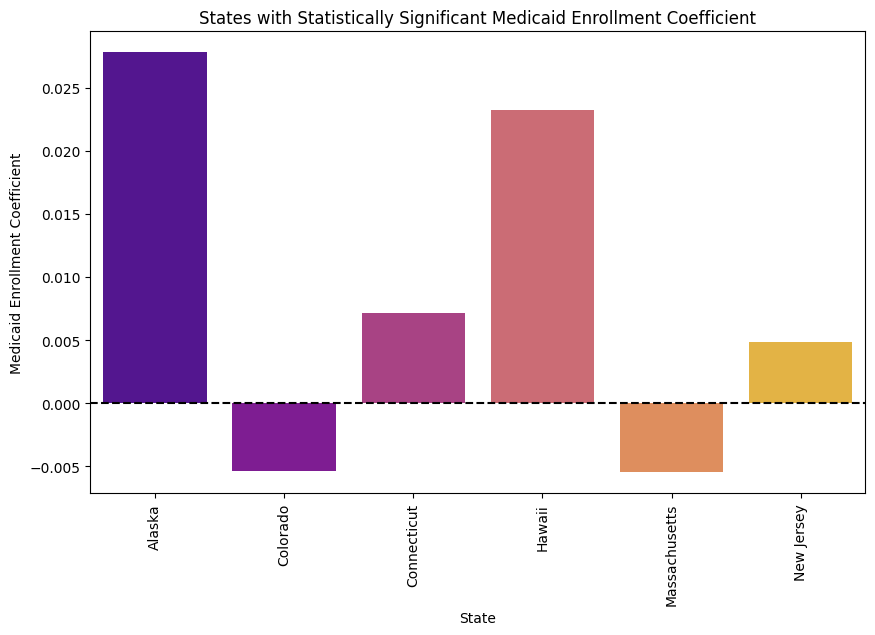

In [48]:
significant_states = results_df[results_df['Medicaid_P_Value'] < 0.05]

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Medicaid_Coef', data=significant_states, palette='plasma')
plt.axhline(0, color='black', linestyle='--')
plt.title("States with Statistically Significant Medicaid Enrollment Coefficient")
plt.xticks(rotation=90)
plt.ylabel("Medicaid Enrollment Coefficient")
plt.show()


In [49]:
for state in significant_states['State']:
    print(f"ARIMA results for {state}:")
    print(arima_results[state])

ARIMA results for Alaska:
                                     SARIMAX Results                                      
Dep. Variable:     Adjusted_Per_Capita_Healthcare   No. Observations:                    7
Model:                             ARIMA(1, 1, 1)   Log Likelihood                  -8.104
Date:                            Sun, 27 Oct 2024   AIC                             24.207
Time:                                    19:53:10   BIC                             23.374
Sample:                                         0   HQIC                            20.873
                                              - 7                                         
Covariance Type:                              opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Medicaid_Enrollment     0.0278      0.014      1.962      0.050    3.5

In [50]:
results_df

,State,Medicaid_Coef,Medicaid_P_Value,AR_Coef,AR_P_Value,MA_Coef,MA_P_Value,AIC
0,Alabama,0.010667,0.443224,-0.914931,1.077073e-01,0.012547,0.997577,11.427739
1,Alaska,0.027814,0.049706,-0.110476,9.646533e-01,-0.997719,0.997664,24.207243
2,Arizona,-0.000817,0.576491,-0.852135,4.706835e-02,-0.985137,0.980994,13.897092
3,Arkansas,0.008554,0.785193,0.735628,9.585571e-01,-0.490386,0.974753,21.709913
4,California,0.000179,0.883108,-0.676955,8.919820e-01,0.327202,0.971074,15.338252
5,Colorado,-0.005356,0.030116,0.126796,9.509061e-01,0.995811,0.992233,13.946338
6,Connecticut,0.007142,0.005474,-0.660387,4.359381e-01,-0.990556,0.985344,18.119588
7,Delaware,0.060968,0.643950,-0.946617,4.057664e-02,0.414796,0.880042,15.326326
8,District of Columbia,-0.030576,0.193644,0.039542,9.739385e-01,-0.998480,0.997115,19.503983
9,Florida,0.000988,0.705949,0.000818,9.999992e-01,0.000813,0.999999,13.311797
